In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.shape

(19158, 13)

In [7]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [8]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15672,0.910,NaN,NaN,4.0,133.0
17640,0.920,Part time course,Graduate,5.0,39.0
13495,0.766,no_enrollment,Graduate,9.0,106.0
17095,0.754,Full time course,Graduate,7.0,22.0
1639,0.920,no_enrollment,Graduate,20.0,83.0


In [10]:
dfn = df[cols].dropna()
df.shape, dfn.shape

((19158, 13), (17182, 5))

<function matplotlib.pyplot.show(close=None, block=None)>

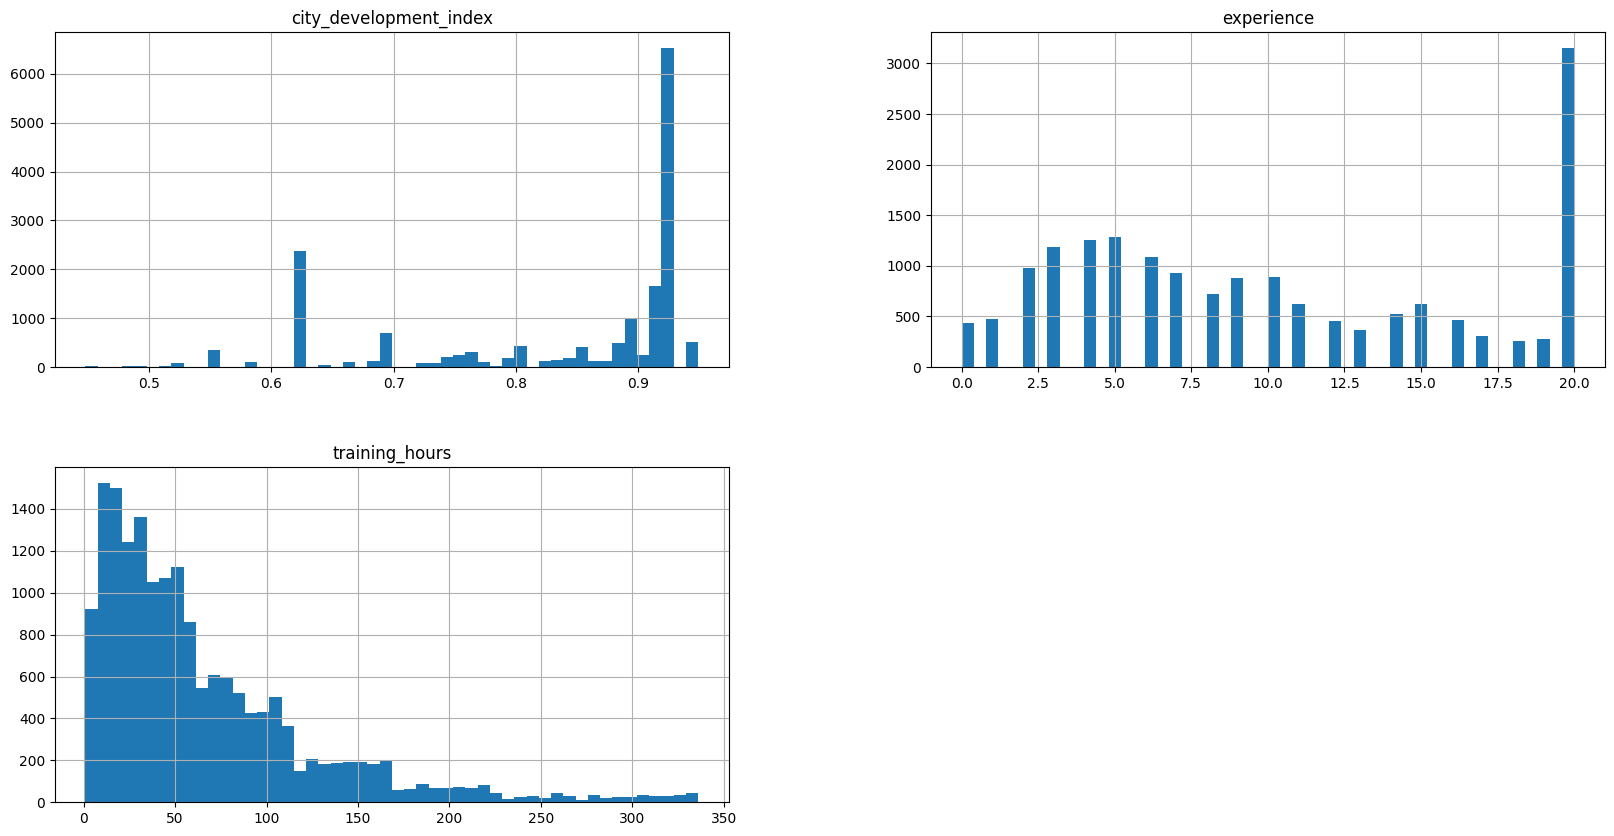

In [14]:
dfn.hist(bins = 50, figsize = (20,10))
plt.show

<Axes: >

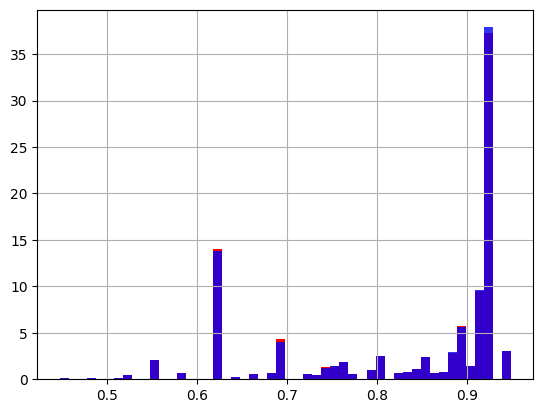

In [16]:
from matplotlib import axes
fig = plt.figure()
axes = fig.add_subplot(111)

df['city_development_index'].hist(bins=50, axes = axes, density=True, color='red')

dfn['city_development_index'].hist(bins=50, axes = axes, density=True, color='blue', alpha=0.8)

<Axes: >

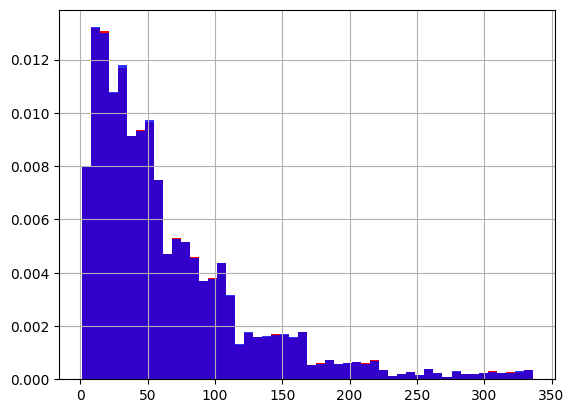

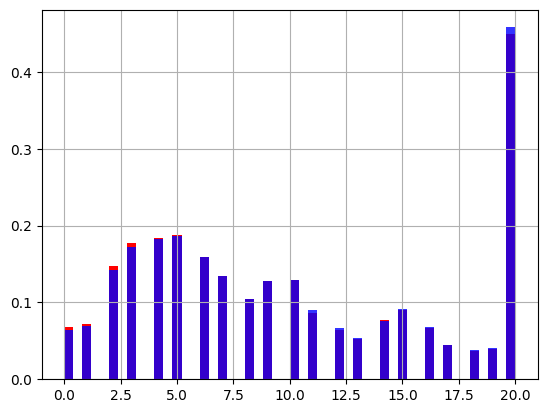

In [22]:
from matplotlib import axes
fig = plt.figure()
axes = fig.add_subplot(111)

df['training_hours'].hist(bins=50, axes = axes, density=True, color='red')

dfn['training_hours'].hist(bins=50, axes = axes, density=True, color='blue', alpha=0.8)


from matplotlib import axes
fig = plt.figure()
axes = fig.add_subplot(111)

df['experience'].hist(bins=50, axes = axes, density=True, color='red')

dfn['experience'].hist(bins=50, axes = axes, density=True, color='blue', alpha=0.8)

In [23]:
temp = pd.concat([
    df['city_development_index'].value_counts()/len(df),
    dfn['city_development_index'].value_counts()/len(dfn)
],axis=1)
temp.columns = ['df','dfn']
temp


,df,dfn
city_development_index,,
0.920,0.265059,0.277733
0.624,0.136705,0.137760
0.910,0.078401,0.081364
0.926,0.067700,0.069200
0.698,0.034659,0.033058
...,...,...
0.649,0.000209,0.000175
0.807,0.000209,0.000233
0.781,0.000157,0.000175


In [42]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [51]:
df['Family'] = df['SibSp'] + df['Parch']
df.head()

KeyError: 'SibSp'

In [46]:
df = df[['Age', 'Fare', 'Family', 'Survived', 'Cabin']]
df.head()

,Age,Fare,Family,Survived,Cabin
0,22.0,7.2500,1,0,NaN
1,38.0,71.2833,1,1,C85
2,26.0,7.9250,0,1,NaN
3,35.0,53.1000,1,1,C123
4,35.0,8.0500,0,0,NaN


In [47]:
df.isnull().sum()

,0
Age,177
Fare,0
Family,0
Survived,0
Cabin,687


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

In [66]:
mean_age = x_train['Age'].mean()
x_train['Age'].fillna(mean_age)

,Age
331,45.500000
733,23.000000
382,32.000000
704,26.000000
813,6.000000
...,...
106,21.000000
270,29.498846
860,41.000000
435,14.000000


,0
Age,"Axes(0.125,0.11;0.168478x0.77)"
Fare,"Axes(0.327174,0.11;0.168478x0.77)"
Family,"Axes(0.529348,0.11;0.168478x0.77)"


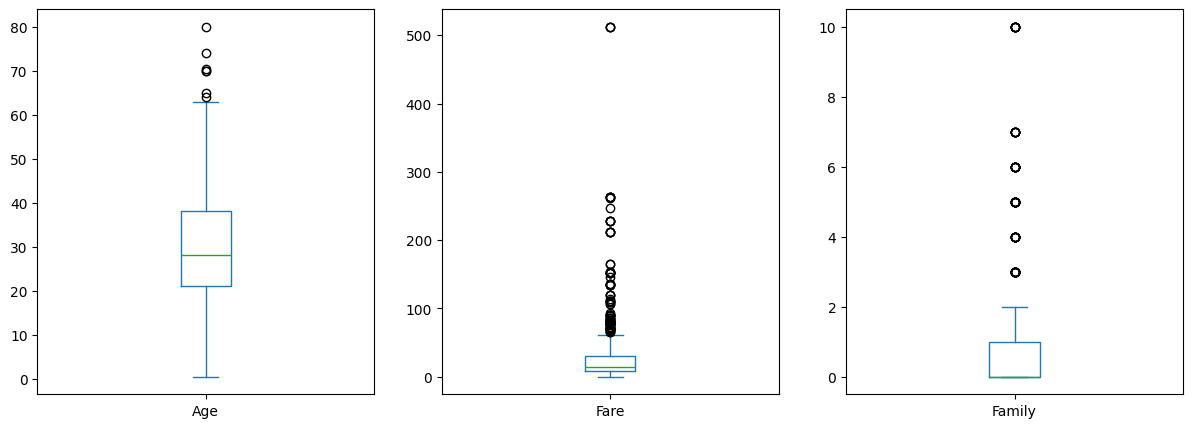

In [67]:
x_train_df = pd.DataFrame(x_train, columns=['Age', 'Fare', 'Family', 'Cabin'])
x_train_df.plot(kind='box', subplots=True, layout=(1,4), figsize=(20,5))

In [68]:
x_train_df = pd.DataFrame(x_train, columns=['Age', 'Fare', 'Family', 'Cabin'])

In [69]:
x_train.isnull().sum()

,0
Age,140
Fare,0
Family,0
Cabin,553


In [70]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [71]:
trf = ColumnTransformer([
    ('imputer2', imputer1, ['Age']),
    ],remainder='passthrough')

In [72]:
x_train = trf.fit_transform(x_train)
x_test = trf.transform(x_test)

,0
Age,"Axes(0.125,0.11;0.168478x0.77)"
Fare,"Axes(0.327174,0.11;0.168478x0.77)"
Family,"Axes(0.529348,0.11;0.168478x0.77)"


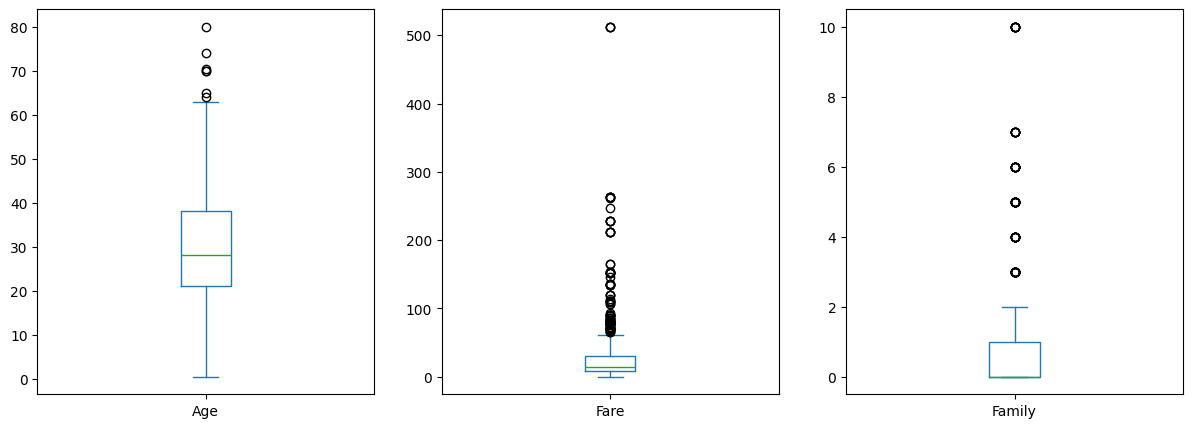

In [73]:
x_train_df.plot(kind='box', subplots=True, layout=(1,4), figsize=(20,5))

In [77]:
x_train = pd.DataFrame(x_train, columns=['Age', 'Fare', 'Family', 'Cabin'])

In [78]:
x_train.isnull().sum()

,0
Age,0
Fare,0
Family,0
Cabin,553


categorical data imputation

In [79]:
df = pd.read_csv('/content/train.csv')

In [81]:
df = df[['FireplaceQu','GarageQual','SalePrice']]

In [82]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [83]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

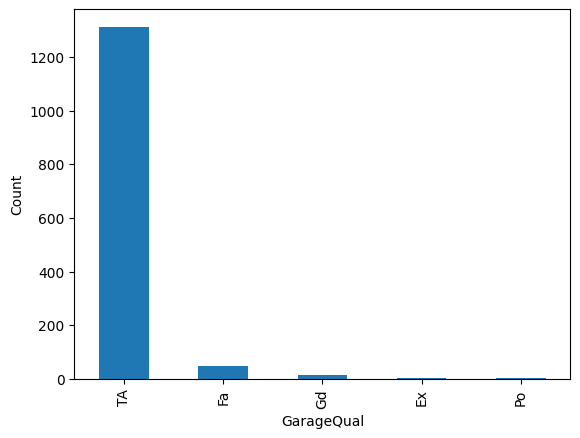

In [84]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count')
plt

In [85]:
df['GarageQual'].fillna('missing',inplace=True)

/tmp/ipython-input-1495229693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('missing',inplace=True)
/tmp/ipython-input-1495229693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GarageQual'].fillna('missing',inplace=True)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

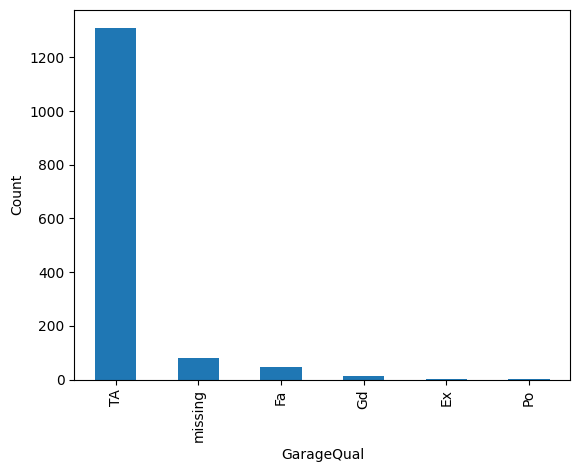

In [86]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count')
plt

In [87]:
x_train.head()

,Age,Fare,Family,Cabin
0,45.5,28.5,0,C124
1,23.0,13.0,0,NaN
2,32.0,7.925,0,NaN
3,26.0,7.8542,1,NaN
4,6.0,31.275,6,NaN


In [89]:
x_train.isnull().sum()

,0
Age,0
Fare,0
Family,0
Cabin,553


# **Using sklearn**

In [90]:
df = pd.read_csv('/content/train.csv')

In [91]:
df = df[['FireplaceQu','GarageQual','SalePrice']]

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=42)

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
imputer = SimpleImputer(strategy='most_frequent')


In [95]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [96]:
x_train = pd.DataFrame(x_train, columns=['FireplaceQu','GarageQual'])

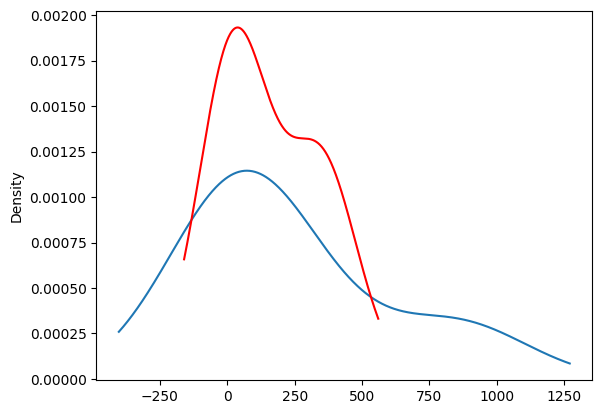

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot( kind = 'kde' , ax=ax)
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot( kind = 'kde' , ax=ax, color = 'red')
plt.show()